---
numbering:
  enumerator: "6.%s"
---

(chap_trees)=
# Tree-based methods

Classification and regression trees are simple yet powerful clustering algorithms popularized by the monograph of @breiman1984classification. Decision trees and their extensions are known to be quite efficient forecasting tools when working on tabular data. A large proportion of winning solutions in ML contests (especially on the Kaggle website^[See www.kaggle.com. ]) resort to improvements of simple trees. For instance, the meta-study in bioinformatics by @olson2018data finds that boosted trees and random forests are the top 2 algorithms from a group of 13, excluding neural networks.

Recently, the surge in Machine Learning applications in Finance has led to multiple publications that use trees in portfolio allocation problems. A long, though not exhaustive, list includes: @ballings2015evaluating, @patel2015predicting, @patel2015bpredicting, @moritz2016tree, @krauss2017deep, @gu2018empirical, @guida2019big, @coqueret2019training and @simonian2019machine. One notable contribution is @bryzgalova2019forest in which the authors create factors from trees by sorting portfolios via simple trees, which they call *Asset Pricing Trees*. Another recent article (@he2021panel) seeks to create global splitting criteria for the purpose of asset pricing.

In this chapter, we review the methodologies associated to trees and their applications in portfolio choice.

## Simple trees
### Principle

Decision trees seek to partition datasets into **homogeneous clusters**. Given an exogenous variable $\mathbf{Y}$ and features $\mathbf{X}$, trees iteratively split the sample into groups (usually two at a time) which are as homogeneous in $\mathbf{Y}$ as possible. The splits are made according to one variable within the set of features. A short word on nomenclature: when $\mathbf{Y}$ consists of real numbers, we talk about *regression trees* and when $\mathbf{Y}$ is categorical, we use the term *classification trees*.

Before formalizing this idea, we illustrate this process in Figure \@ref(fig:treescheme). There are 12 stars with three features: color, size and complexity (number of branches).

![Elementary tree scheme; visualization of the splitting process.](images/tree_scheme.png)

The dependent variable is the color (let's consider the wavelength associated to the color for simplicity). The first split is made according to size or complexity. Clearly, complexity is the better choice: complicated stars are blue and green, while simple stars are yellow, orange and red. Splitting according to size would have mixed blue and yellow stars (small ones) and green and orange stars (large ones).

The second step is to split the two clusters one level further. Since only one variable (size) is relevant, the secondary splits are straightforward. In the end, our stylized tree has four consistent clusters. The analogy with factor investing is simple: the color represents performance: red for high performance and blue for mediocre performance. The features (size and complexity of stars) are replaced by firm-specific attributes, such as capitalization, accounting ratios, etc. Hence, the purpose of the exercise is to find the characteristics that allow to split firms into the ones that will perform well versus those likely to fare more poorly.

We now turn to the technical construction of regression trees (splitting process). We follow the standard literature as exposed in @breiman1984classification or in chapter 9 of @friedman2009elements. Given a sample of ($y_i$,$\mathbf{x}_i$) of size $I$, a *regression* tree seeks the splitting points that minimize the total variation of the $y_i$ inside the two child clusters. These two clusters need not have the same size. In order to do that, it proceeds in two steps. First, it finds, for each feature $x_i^{(k)}$, the best splitting point (so that the clusters are homogeneous in $\mathbf{Y}$). Second, it selects the feature that achieves the highest level of homogeneity. 

Homogeneity in regression trees is closely linked to variance. Since we want the $y_i$ inside each cluster to be similar, we seek to **minimize their variability** (or **dispersion**) inside each cluster and then sum the two figures. We cannot sum the variances because this would not take into account the relative sizes of clusters. Hence, we work with *total* variation, which is the variance times the number of elements in the clusters. 

Below, the notation is a bit heavy because we resort to superscripts $k$ (the index of the feature), but it is largely possible to ignore these superscripts to ease understanding. The first step is to find the best split for each feature, that is, solve $\underset{c^{(k)}}{\text{argmin}} \ V^{(k)}_I(c^{(k)})$ with

$$
V^{(k)}_I(c^{(k)})= \underbrace{\sum_{x_i^{(k)}<c^{(k)}}\left(y_i-m_I^{k,-}(c^{(k)}) \right)^2}_{\text{Total dispersion of first cluster}} + \underbrace{\sum_{x_i^{(k)}>c^{(k)}}\left(y_i-m_I^{k,+}(c^{(k)}) \right)^2}_{\text{Total dispersion of second cluster}},
$$

where 

$$
\begin{align*}
m_I^{k,-}(c^{(k)})&=\frac{1}{\#\{i,x_i^{(k)}<c^{(k)} \}}\sum_{\{x_i^{(k)}<c^{(k)} \}}y_i \quad \text{ and } \\ m_I^{k,+}(c^{(k)})&=\frac{1}{\#\{i,x_i^{(k)}>c^{(k)} \}}\sum_{\{x_i^{(k)}>c^{(k)} \}}y_i
\end{align*}
$$

are the average values of $Y$, conditional on $X^{(k)}$ being smaller or larger than $c$. The cardinal function $\#\{\cdot\}$ counts the number of instances of its argument. For feature $k$, the optimal split $c^{k,*}$ is thus the one for which the total dispersion over the two subgroups is the smallest. 

The optimal splits satisfy $c^{k,*}= \underset{c^{(k)}}{\text{argmin}} \ V^{(k)}_I(c^{(k)})$. Of all the possible splitting variables, the tree will choose the one that minimizes the total dispersion not only over all splits, but also over all variables: $k^*=\underset{k}{\text{argmin}} \ V^{(k)}_I(c^{k,*})$.

After one split is performed, the procedure continues on the two newly formed clusters. There are several criteria that can determine when to stop the splitting process (see Section \@ref(pruning-criteria)). One simple criterion is to fix a maximum number of levels (the depth) for the tree. A usual condition is to impose a minimum gain that is expected for each split. If the reduction in dispersion after the split is only marginal and below a specified threshold, then the split is not executed. For further technical discussions on decision trees, we refer for instance to section 9.2.4 of @friedman2009elements.

When the tree is built (trained), a prediction for new instances is easy to make. Given its feature values, the instance ends up in one leaf of the tree. Each leaf has an average value for the label: this is the predicted outcome. Of course, this only works when the label is numerical. We discuss below the changes that occur when it is categorical.

### Further details on classification {#treeclass}

Classification exercises are somewhat more complex than regression tasks. The most obvious difference is the measure of dispersion or heterogeneity. This loss function which must take into account the fact that the final output is not a simple number, but a vector. The output $\tilde{\textbf{y}}_i$ has as many elements as there are categories in the label and each element is the probability that the instance belongs to the corresponding category. 

For instance, if there are 3 categories: *buy*, *hold* and *sell*, then each instance would have a label with as many columns as there are classes. Following our example, one label would be (1,0,0) for a *buy* position for instance. We refer to Section \@ref(categorical-labels) for a introduction on this topic.

Inside a tree, labels are aggregated at each cluster level. A typical output would look like (0.6,0.1,0.3): they are the proportions of each class represented within the cluster. In this case, the cluster has 60% of *buy*, 10% of *hold* and 30% of *sell*. 

The loss function must take into account this multidimensionality of the label. When building trees, since the aim is to favor homogeneity, the loss penalizes outputs that are not concentrated towards one class. Indeed, facing a diversified output of (0.3,0.4,0.3) is much harder to handle than the concentrated case of (0.8,0.1,0.1).

The algorithm is thus seeking purity: it searches a splitting criterion that will lead to clusters that are as pure as possible, i.e., with one very dominant class, or at least just a few dominant classes. There are several metrics proposed by the literature and all are based on the proportions generated by the output. If there are $J$ classes, we denote these proportions with $p_j$. For each leaf, the usual loss functions are:

- the Gini impurity index: $1-\sum_{j=1}^Jp_j^2;$  
- the misclassification error: $1-\underset{j}{\text{max}}\, p_j;$  
- entropy: $-\sum_{j=1}^J\log(p_j)p_j.$  

The Gini index is nothing but one minus the Herfindahl index which measures the diversification of a portfolio. Trees seek partitions that are the least diversified. The minimum value of the Gini index is zero and reached when one $p_j=1$ and all others are equal to zero. The maximum value is equal to $1-1/J$ and is reached when all $p_j=1/J$. Similar relationships hold for the other two losses. One drawback of the misclassification error is its lack of differentiability which explains why the other two options are often favored.

Once the tree is grown, new instances automatically belong to one final leaf. This leaf is associated to the proportions of classes it nests. Usually, to make a prediction, the class with highest proportion (or probability) is chosen when a new instance is associated with the leaf.

### Pruning criteria

When building a tree, the splitting process can be pursued until the full tree is grown, that is, when:   

- all instances belong to separate leaves, and/or    
- all leaves comprise instances that cannot be further segregated based on the current set of features.

At this stage, the splitting process cannot be pursued.

Obviously, fully grown trees often lead to almost perfect fits when the predictors are relevant, numerous and numerical. Nonetheless, the fine grained idiosyncrasies of the training sample are of little interest for out-of-sample predictions. For instance, being able to perfectly match the patterns of 2000 to 2006 will probably not be very interesting in the period from 2007 to 2009. The most reliable sections of the trees are those closest to the root because they embed large portions of the data: the average values in the early clusters are trustworthy because the are computed on a large number of observations. The first splits are those that matter the most because they determine the most general patterns. The deepest splits only deal with the peculiarities of the sample.

Thus, it is imperative to limit the size of the tree to avoid overfitting. There are several ways to prune the tree and all depend on some particular criteria. We list a few of them below:

- Impose a minimum number of instances for each terminal node (leaf). This ensures that each final cluster is composed of a sufficient number of observations. Hence, the average value of the label will be reliable because it is calculated on a large amount of data.    
- Similarly, it can be imposed that a cluster has a minimal size before even considering any further split. This criterion is of course related to the one above.    
- Require a certain threshold of improvement in the fit. If a split does not sufficiently reduce the loss, then it can be deemed unnecessary. The user specifies a small number $\epsilon>0$ and a split is only validated if the loss obtained post-split is smaller than $1-\epsilon$ times the loss before the split.     
- Limit the depth of the tree. The depth is defined as the overal maximum number of splits between the root and any leaf of the tree.

In the example below, we implement all of these criteria at the same time, but usually, two of them at most should suffice.

### Code and interpretation

We start with a simple tree and its interpretation. We use the package *scikit-learn* and its plotting engine. The label is the future 1-month return and the features are all predictors available in the sample. The tree is trained on the full sample.

In [25]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Building the data & import functions
from data_build import generate_data
data_ml, features, features_short, returns, stock_ids, stock_ids_short = generate_data()
features_short =["Div_yld", "EPS", "Size12m", "Mom_LT", "Ocf", "PB", "Vol_LT"]
separation_date = "2017-01-15"
data_ml_clean = data_ml.dropna(subset=(features + ['R1M']))

There usually exists a convention in the representation of trees. At each node, a condition describes the split with a Boolean expression. If the expression is **true**, then the instance goes to the **left cluster**; if not, it goes to the *right* cluster. Given the whole sample, the initial split in this tree (Figure \@ref(fig:rpart1)) is performed according to the price-to-book ratio. If the Pb score (or value) of the instance is above 0.025, then the instance is placed in the left bucket; otherwise, it goes in the **right bucket**. 

At each node, there are two important metrics. The first one is the average value of the label in the cluster, and the second one is the proportion of instances in the cluster. At the top of the tree, all instances (100%) are present and the average 1-month future return is 1.3%. One level below, the left cluster is by far the most crowded, with roughly 98% of observations averaging a 1.2% return. The right cluster is much smaller (2%) but concentrates instances with a much higher average return (5.9%). This is possibly an idiosyncracy of the sample.

The splitting process continues similarly at each node until some condition is satisfied (typically here: the maximum depth is reached). A color codes the average return: from white (low return) to blue (high return). The leftmost cluster with the lowest average return consists of firms that satisfy *all* the following criteria:  

- have a Pb score above 0.025;  
- have a 3-month market capitalization score above 0.16;  
- have a score of average daily volume over the past 3 months above 0.85.

Notice that one peculiarity of trees is their possible heterogeneity in cluster sizes. Sometimes, a few clusters gather almost all of the observations while a few small groups embed some outliers. This is not a favorable property of trees, as small groups are more likely to be flukes and may fail to generalize out-of-sample.

This is why we imposed restrictions during the construction of the tree. The first one (min_samples_leaf = 3500 in the code) imposes that each cluster consists of at least 3500 instances. The second one (min_samples_split) further imposes that a cluster comprises at least 8000 observations in order to pursue the splitting process. These values logically depend on the size of the training sample. The ccp_alpha = 0.0001 parameter in the code requires any split to reduce the loss below 0.9999 times its original value before the split. Finally, the maximum depth of three essentially means that there are at most three splits between the root of the tree and any terminal leaf. 

The complexity of the tree (measured by the number of terminal leaves) is a decreasing function of min_samples_leaf, min_samples_split and ccp_alpha and an increasing function of maximum depth.

Once the model has been trained (i.e., the tree is grown), a prediction for any instance is the average value of the label within the cluster where the instance should land.

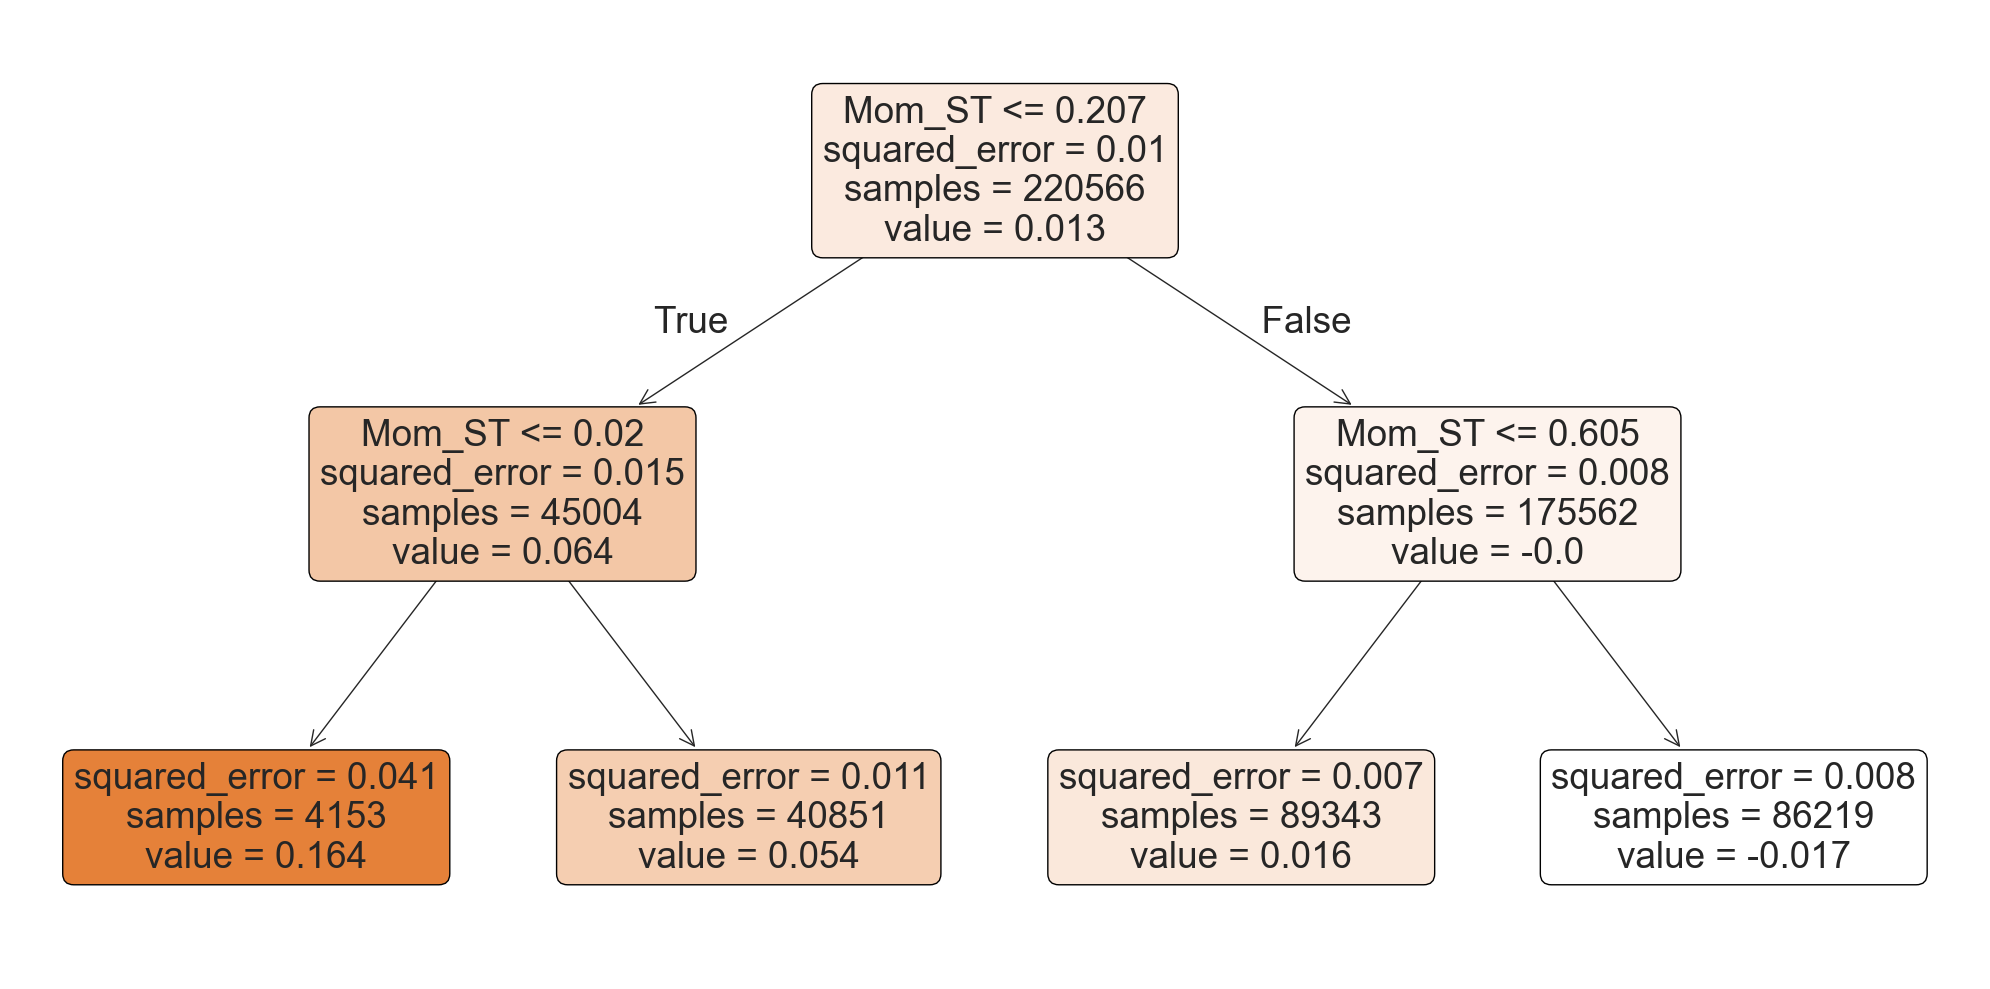

array([0.01557599, 0.01557599, 0.01557599, 0.01557599, 0.01557599,
       0.01557599])

In [26]:
#| label: fig-first_tree
#| fig-cap: "Simple characteristics-based tree. The dependent variable is the 1 month future return."
X = data_ml_clean[features]
y = data_ml_clean['R1M']

fit_tree = DecisionTreeRegressor(
    min_samples_leaf=350,   # Min nb of obs required in each terminal node (leaf)
    min_samples_split=800,  # Min nb of obs required to continue splitting
    ccp_alpha=0.0001,       # Complexity parameter: smaller = more leaves
    max_depth=4             # Maximum depth (i.e. tree levels)
)
fit_tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(fit_tree, feature_names=features, filled=True, rounded=True)
plt.tight_layout()
plt.show()

# Test (prediction) on the first six instances of the sample
fit_tree.predict(data_ml_clean[features].iloc[0:6])

Given the figure, we immediately conclude that these first six instances all belong to the second cluster (starting from the left). 

As a verification of the first splits, we plot the smoothed average of future returns, conditionally on market capitalization, price-to-book ratio and trading volume.

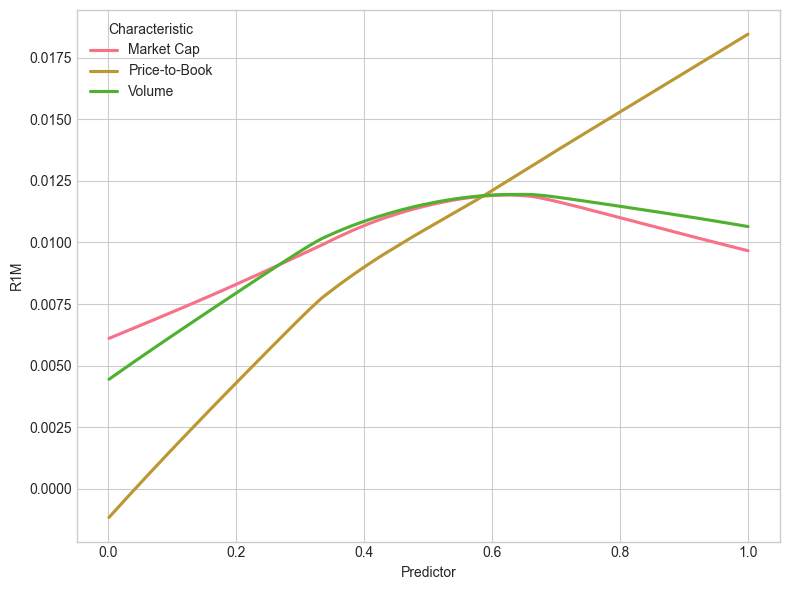

In [27]:
#| label: fig-tree_cond
#| fig-cap: "Average of 1-month future returns, conditionally on market capitalization, price-to-book and volume scores."

fig, ax = plt.subplots(figsize=(8, 6))

# Smoothed average of 1-month future returns, conditionally on different predictors
sns.regplot(data=data_ml, x='Size12m', y='R1M', 
            scatter=False, lowess=True, label='Market Cap', ax=ax)
sns.regplot(data=data_ml, x='PB', y='R1M', 
            scatter=False, lowess=True, label='Price-to-Book', ax=ax)
sns.regplot(data=data_ml, x='ADV_TradedST', y='R1M', 
            scatter=False, lowess=True, label='Volume', ax=ax)

ax.set_xlabel('Predictor')
ax.legend(title='Characteristic')
plt.tight_layout()
plt.show()

The graph shows the relevance of clusters based on market capitalizations and price-to-book ratios. For low score values of these two features, the average return is high (close to +4% on a monthly basis on the left of the curves). The pattern is more pronounced compared to volume for instance.

Finally, we assess the predictive quality of a single tree on the testing set (the tree is grown on the training set). We use a deeper tree, with a maximum depth of five.

In [28]:
# Prepare training and testing data
training_sample = data_ml_clean[data_ml['date'] <= separation_date]
testing_sample = data_ml_clean[data_ml['date'] > separation_date]# Prepare training and testing data
X_train = training_sample[features]
y_train = training_sample['R1M']
X_test = testing_sample[features]
y_test = testing_sample['R1M']

fit_tree2 = DecisionTreeRegressor(
    min_samples_leaf=1500,   # Min nb of obs required in each terminal node (leaf)
    min_samples_split=4000,  # Min nb of obs required to continue splitting
    ccp_alpha=0.0001,        # Complexity parameter: smaller = more leaves
    max_depth=5              # Maximum depth (i.e. tree levels)
)
fit_tree2.fit(X_train, y_train)

# Predictions
predictions = fit_tree2.predict(X_test)

# MSE
mse = np.round(np.mean((predictions - y_test) ** 2), 5)
print(f"MSE: {mse}")

# Hit ratio
hit_ratio = np.round(np.mean(predictions * y_test > 0), 5)
print(f"Hit ratio: {hit_ratio}")

MSE: 0.00911
Hit ratio: 0.60256


The mean squared error is usually hard to interpret. It's not easy to map an error on returns into the impact on investment decisions. The hit ratio is a more intuitive indicator because it evaluates the proportion of correct guesses (and hence profitable investments). Obviously, it is not perfect: 55% of small gains can be mitigated by 45% of large losses. Nonetheless, it is a popular metric and moreover it corresponds to the usual accuracy measure often computed in binary classification exercises. Here, an accuracy around 0.52 is satisfactory. Even if any number above 50% may seem valuable, it must not be forgotten that transaction costs will curtail benefits. Hence, the benchmark threshold is probably at least at 52%.

## Random forests

While trees give intuitive representations of relationships between $\mathbf{Y}$ and $\mathbf{X}$, they can be improved via the simple idea of ensembles in which predicting tools are *combined* (this topic of **model aggregation** is discussed both more generally and in more details in Chapter \@ref(ensemble)).

### Principle

Most of the time, when having several modelling options at hand, it is not obvious upfront which individual model is the best, hence a combination seems a reasonable path towards the diversification of prediction errors (when they are not too correlated). Some theoretical foundations of model diversification were laid out in @schapire1990strength.  

More practical considerations were proposed later in @ho1995random and more importantly in @breiman2001random which is the major reference for random forests. Bagging is successfully used in @yin2020equity to aggregate equity forecasts. There are two ways to create multiple predictors from simple trees, and random forests combine both: 

- first, the model can be trained on similar yet different datasets. One way to achieve this is via bootstrap: the instances are resampled with or without replacement (for each individual tree), yielding new training data each time a new tree is built.   
- second, the data can be altered by curtailing the number of predictors. Alternative models are built based on different sets of features. The user chooses how many features to retain and then the algorithm selects these features randomly at each try.

Hence, it becomes simple to grow many different trees and the ensemble is simply a **weighted combination** of all trees. Usually, equal weights are used, which is an agnostic and robust choice. We illustrate the idea of simple combinations (also referred to as bagging) in Figure \@ref(fig:RF) below. The terminal prediction is simply the mean of all intermediate predictions.

![Combining tree outputs via random forests.](images/tree_RF.png)

Random forests, because they are built on the idea of bootstrapping, are more efficient than simple trees. They are used by @ballings2015evaluating, @patel2015predicting, @krauss2017deep, and @huck2019large and they are shown to perform very well in these papers. The original theoretical properties of random forests are demonstrated in @breiman2001random for classification trees. In classification exercises, the decision is taken by a vote: each tree votes for a particular class and the class with the most votes wins (with possible random picks in case of ties). @breiman2001random defines the margin function as 

$$mg=M^{-1}\sum_{m=1}^M1_{\{h_m(\textbf{x})=y\}}-\max_{j\neq y}\left(M^{-1}\sum_{m=1}^M1_{\{h_m(\textbf{x})=j\}}\right),$$

where the left part is the average number of votes based on the $M$ trees $h_m$ for the correct class (the models $h_m$ based on $\textbf{x}$ matches the data value $y$). The right part is the maximum average for any other class. The margin reflects the confidence that the aggregate forest will classify properly. The generalization error is the probability that $mg$ is strictly negative. @breiman2001random shows that the inaccuracy of the aggregation (as measured by generalization error) is bounded by $\bar{\rho}(1-s^2)/s^2$, where    
- $s$ is the strength (average quality^[The strength is measured as the average margin, i.e. the average of $mg$ when there is only one tree.]) of the individual classifiers and    
- $\bar{\rho}$ is the average correlation between the learners.

Notably, @breiman2001random also shows that as the number of trees grows to infinity, the inaccuracy converges to some finite number which explains why random forests are not prone to overfitting. 

While the original paper of @breiman2001random is dedicated to classification models, many articles have since then tackled the problem of regression trees. We refer the interested reader to @biau2012analysis and @scornet2015consistency. Finally, further results on classifying ensembles can be obtained in @biau2008consistency and we mention the short survey paper by @denil2014narrowing which sums up recent results in this field.

### Code and results

Several implementations of random forests exist. For simplicity, we choose to work with the scikit-learn library, but another choice could be the one developed by h2o, which is a highly efficient meta-environment for machine learning (coded in Java).

The syntax of RandomForestRegressor follows that of many ML libraries. The full list of options for some random forest implementations is prohibitively large.^[See, e.g., http://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/reference/h2o.randomForest.html] Below, we train a model and exhibit the predictions for the first 5 instances of the testing sample.

In [29]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)  # Sets the random seed

X_train = training_sample[features]
y_train = training_sample['R1M']
X_test = testing_sample[features]
y_test = testing_sample['R1M']

fit_RF = RandomForestRegressor(
    n_estimators=40,         # Nb of random trees
    max_samples=10000,       # Size of (random) sample for each tree
    bootstrap=True,          # Sampling with replacement (set False for without)
    min_samples_leaf=250,    # Minimum size of terminal cluster
    max_features=30,         # Nb of predictive variables for each tree
    random_state=42
)
fit_RF.fit(X_train, y_train)

# Prediction over the first 5 test instances
fit_RF.predict(X_test.iloc[0:5])

array([ 0.05552201,  0.02574694, -0.0067237 ,  0.03020125,  0.03718925])

One first comment is that each instance has its own prediction, which contrasts with the outcome of simple tree-based outcomes. Combining many trees leads to tailored forecasts. Note that the second line of the chunk freezes the random number generation. Indeed, random forests are by construction contingent on the arbitrary combinations of instances and features that are chosen to build the individual learners.

In the above example, each individual learner (tree) is built on 10,000 randomly chosen instances (without replacement) and each terminal leaf (cluster) must comprise at least 240 elements (observations). In total, 40 trees are aggregated and each tree is constructed based on 30 randomly chosen predictors (out of the whole set of features).

Unlike for simple trees, it is not possible to simply illustrate the outcome of the learning process (though solutions exist, see Section \@ref(surr)). It could be possible to extract all 40 trees, but a synthetic visualization is out-of-reach. A simplified view can be obtained via variable importance, as is discussed in Section \@ref(variable-importance).

Finally, we can assess the accuracy of the model.

In [30]:
predictions_RF = fit_RF.predict(X_test)

# MSE
mse_RF = np.round(np.mean((predictions_RF - y_test) ** 2), 5)
print(f"MSE: {mse_RF}")

# Hit ratio
hit_ratio_RF = np.round(np.mean(predictions_RF * y_test > 0), 5)
print(f"Hit ratio: {hit_ratio_RF}")

MSE: 0.00888
Hit ratio: 0.61025


The MSE is smaller than 4% and the hit ratio is close to 54%, which is reasonably above both 50% and 52% thresholds.

Let's see if we can improve the hit ratio by resorting to a classification exercise. We start by training the model on a new formula (the label is R1M_C).

In [31]:
from sklearn.ensemble import RandomForestClassifier

# For classification, we use the categorical label R1M_C
y_train_C = training_sample['R1M_C']
y_test_C = testing_sample['R1M_C']

fit_RF_C = RandomForestClassifier(
    n_estimators=40,         # Nb of random trees
    max_samples=20000,       # Size of (random) sample for each tree
    bootstrap=True,          # Sampling with replacement
    min_samples_leaf=250,    # Minimum size of terminal cluster
    max_features=30,         # Nb of predictive variables for each tree
    random_state=42
)
fit_RF_C.fit(X_train, y_train_C)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,250
,min_weight_fraction_leaf,0.0
,max_features,30
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We can then assess the proportion of correct (binary) guesses.

In [32]:
# Hit ratio for classification
predictions_RF_C = fit_RF_C.predict(X_test)
hit_ratio_C = np.round(np.mean(predictions_RF_C == y_test_C), 5)
print(f"Hit ratio: {hit_ratio_C}")

Hit ratio: 0.64274


The accuracy is disappointing. There are two potential explanations for this (beyond the possibility of very different patterns in the training and testing sets). The first one is the sample size, which may be too small. The original training set has more than 200,000 observations, hence we retain only one in 10 in the above training specification. We are thus probably sidelining relevant information and the cost can be heavy. The second reason is the number of predictors, which is set to 30, i.e., one third of the total at our disposal. Unfortunately, this leaves room for the algorithm to pick less pertinent predictors. The default numbers of predictors chosen by the routines are $\sqrt{p}$ and $p/3$ for classification and regression tasks, respectively. Here $p$ is the total number of features.

## Boosted trees: Adaboost {#adaboost}

The idea of boosting is slightly more advanced compared to agnostic aggregation. In random forest, we hope that the diversification through many trees will improve the overall quality of the model. In boosting, it is sought to iteratively improve the model whenever a new tree is added. There are many ways to boost learning and we present two that can easily be implemented with trees. The first one (Adaboost, for adaptive boosting) improves the learning process by progressively focusing on the instances that yield the largest errors. The second one (xgboost) is a flexible algorithm in which each new tree is only focused on the minimization of the training sample loss.

### Methodology

The origins of adaboost go back to @freund1997decision and @freund1996experiments, and for the sake of completeness, we also mention the book dedicated to boosting by @schapire2012boosting. Extensions of these ideas are proposed in @friedman2000additive (the so-called real Adaboost algorithm) and in @drucker1997improving (for regression analysis). Theoretical treatments were derived by @breiman2004population.

We start by directly stating the general structure of the algorithm:

- set equal weights $w_i=I^{-1}$;    
- For $m=1,\dots,M$ do: 
1. Find a learner $l_m$ that minimizes the weighted loss $\sum_{i=1}^Iw_iL(l_m(\textbf{x}_i),\textbf{y}_i)$; 
2. Compute a learner weight 
$$
a_m=f_a(\textbf{w},l_m(\textbf{x}),\textbf{y});
$$
3. Update the instance weights 
$$
w_i \leftarrow w_ie^{f_w(l_m(\textbf{x}_i), \textbf{y}_i)};
$$
4. Normalize the $w_i$ to sum to one. 
- The output for instance $\textbf{x}_i$ is a simple function of $\sum_{m=1}^M a_ml_m(\textbf{x}_i)$, 
$$
\tilde{y}_i=f_y\left(\sum_{m=1}^M a_ml_m(\textbf{x}_i) \right).
$$

Let us comment on the steps of the algorithm. The formulation holds for many variations of Adaboost and we will specify the functions $f_a$ and $f_w$ below. 

1. The first step seeks to find a learner (tree) $l_m$ that minimizes a weighted loss. Here the base loss function $L$ essentially depends on the task (regression versus classification).    
2. The second and third steps are the most interesting because they are the heart of Adaboost: they define the way the algorithm adapts sequentially. Because the purpose is to aggregate models, a more sophisticated approach compared to uniform weights for learners is a tailored weight for each learner. A natural property (for $f_a$) should be that a learner that yields a smaller error should have a larger weight because it is more accurate.      
3. The third step is to change the weights of observations. In this case, because the model aims at improving the learning process, $f_w$ is constructed to give more weight on observations for which the current model does not do a good job (i.e., generates the largest errors). Hence, the next learner will be incentivized to pay more attention to these pathological cases.     
4. The third step is a simple scaling procedure.     

In Table \@ref(tab:adaboost), we detail two examples of weighting functions used in the literature. For the original Adaboost (@freund1996experiments, @freund1997decision), the label is binary with values +1 and -1 only. The second example stems from @drucker1997improving and is dedicated to regression analysis (with real-valued label). The interested reader can have a look at other possibilities in @schapire2003boosting and @ridgeway1999boosting.


|  | Bin. classif. (orig. Adaboost) | Regression (Drucker (1997)) |
|---|---|--- |
|Individual error| $\epsilon_i=\textbf{1}_{\left\{y_i\neq l_m(\textbf{x}_i) \right\}}$ | $\epsilon_i=\frac{|y_i- l_m(\textbf{x}_i)|}{\underset{i}{\max}|y_i- l_m(\textbf{x}_i)|}$ |
|Weight of learner via $f_a$ |$f_a=\log\left(\frac{1-\epsilon}{\epsilon} \right)$,with  $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$|$f_a=\log\left(\frac{1-\epsilon}{\epsilon} \right)$,with  $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$|
|Weight of instances via $f_w(i)$ | $f_w=f_a\epsilon_i$  |$f_w=f_a\epsilon_i$ |
|Output function via $f_y$|$f_y(x) = \text{sign}(x)$ | weighted median of predictions|

Table: Examples of functions for Adaboost-like algorithms.

Let us comment on the original Adaboost specification. The basic error term $\epsilon_i=\textbf{1}_{\left\{y_i\neq l_m(\textbf{x}_i) \right\}}$ is a dummy number indicating if the prediction is correct (we recall only two values are possible, +1 and -1). The average error $\epsilon\in [0,1]$ is simply a weighted average of individual errors and the weight of the $m^{th}$ learner defined in Equation \@ref(eq:adaboostam) is given by $a_m=\log\left(\frac{1-\epsilon}{\epsilon} \right)$. The function $x\mapsto \log((1-x)x^{-1})$ decreases on $[0,1]$ and switches sign (from positive to negative) at $x=1/2$. Hence, when the average error is small, the learner has a large positive weight, but when the error becomes large, the learner can even obtain a negative weight. Indeed, the threshold $\epsilon>1/2$ indicated that the learner is wrong more than 50% of the time. Obviously, this indicates a problem and the learner should even be discarded. 

The change in instance weights follows a similar logic. The new weight is proportional to $w_i\left(\frac{1-\epsilon}{\epsilon} \right)^{\epsilon_i}$. If the prediction is right and $\epsilon_i=0$, the weight is unchanged. If the prediction is wrong and $\epsilon_i=1$, the weight is adjusted depending on the aggregate error $\epsilon$. If the error is small and the learner efficient ($\epsilon<1/2$), then $(1-\epsilon)/\epsilon>1$ and the weight of the instance increases. This means that for the next round, the learner will have to focus more on instance $i$.

Lastly, the final prediction of the model corresponds to the sign of the weighted sums of individual predictions: if the sum is positive, the model will predict +1 and it will yield -1 otherwise.^[The Real Adaboost of @friedman2000additive has a different output: the probability of belonging to a particular class.] The odds of a zero sum are negligible. In the case of numerical labels, the process is slightly more complicated and we refer to Section 3, step 8 of @drucker1997improving for more details on how to proceed.

We end this presentation with one word on instance weighting. There are two ways to deal with this topic. The first one works at the level of the loss functions. For regression trees, Equation \@ref(eq:node) would naturally generalize to 
$$V^{(k)}_N(c^{(k)}, \textbf{w})= \sum_{x_i^{(k)}<c^{(k)}}w_i\left(y_i-m_N^{k,-}(c^{(k)}) \right)^2 + \sum_{x_i^{(k)}>c^{(k)}}w_i\left(y_i-m_N^{k,+}(c^{(k)}) \right)^2,$$

and hence an instance with a large weight $w_i$ would contribute more to the dispersion of its cluster. For classification objectives, the alteration is more complex and we refer to @ting2002instance for one example of an instance-weighted tree-growing algorithm. The idea is closely linked to the alteration of the misclassification risk via a loss matrix (see Section 9.2.4 in @friedman2009elements). 

The second way to enforce instance weighting is via random sampling. If instances have weights $w_i$, then the training of learners can be performed over a sample that is randomly extracted with distribution equal to $w_i$. In this case, an instance with a larger weight will have more chances to be represented in the training sample. The original adaboost algorithm relies on this method.

### Illustration

Below, we test an implementation of the original Adaboost classifier. As such, we work with the R1M_C variable and change the model formula. The computational cost of Adaboost is high on large datasets, thus we work with a smaller sample and we only impose three iterations.

In [33]:
X_train_ada = training_sample[features]
y_train_ada = training_sample['R1M_C']

# Adaboost classifier
fit_adaboost_C = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),  # Base estimator (decision stump)
    n_estimators=3,                                  # Number of trees
    random_state=42
)
fit_adaboost_C.fit(X_train_ada, y_train_ada)

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,3
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


Finally, we evaluate the performance of the classifier.

In [34]:
# Hit ratio
predictions_ada = fit_adaboost_C.predict(testing_sample[features])
hit_ratio_ada = np.mean(testing_sample['R1M_C'] == predictions_ada)
print(f"Hit ratio: {hit_ratio_ada}")

Hit ratio: 0.6249692829409741


The accuracy (as evaluated by the hit ratio) is clearly not satisfactory. One reason for this may be the restrictions we enforced for the training (smaller sample and only three trees).

## Boosted trees: extreme gradient boosting

The ideas behind **tree boosting** were popularized, among others, by @mason2000boosting, @friedman2001greedy, and @friedman2002stochastic. In this case, the combination of learners (prediction tools) is not agnostic as in random forest, but adapted (or optimized) at the learner level. At each step $s$, the sum of models $M_S=\sum_{s=1}^{S-1}m_s+m_S$ is such that the last learner $m_S$ was precisely designed to reduce the loss of $M_S$ on the training sample.

Below, we follow closely the original work of @chen2016xgboost because their algorithm yields incredibly accurate predictions and also because it is highly customizable. It is their implementation that we use in our empirical section. The other popular alternative is lightgbm (see @ke2017lightgbm). What XGBoost seeks to minimize is the objective 
$$O=\underbrace{\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)}_{\text{error term}} \quad + \underbrace{\sum_{j=1}^J\Omega(T_j)}_{\text{regularization term}}.$$
The first term (over all instances) measures the distance between the true label and the output from the model. The second term (over all trees) penalizes models that are too complex. 

For simplicity, we propose the full derivation with the simplest loss function $\text{loss}(y,\tilde{y})=(y-\tilde{y})^2$, so that:
$$O=\sum_{i=1}^I \left(y_i-m_{J-1}(\mathbf{x}_i)-T_J(\mathbf{x}_i)\right)^2+ \sum_{j=1}^J\Omega(T_j).$$

### Managing loss
Let us assume that we have already built all trees $T_{j}$ up to $j=1,\dots,J-1$ (and hence model $M_{J-1}$): how to choose tree $T_J$ optimally? We rewrite
$$
\begin{align*}
O&=\sum_{i=1}^I \left(y_i-m_{J-1}(\mathbf{x}_i)-T_J(\mathbf{x}_i)\right)^2+ \sum_{j=1}^J\Omega(T_j) \\
&=\sum_{i=1}^I\left\{y_i^2+m_{J-1}(\mathbf{x}_i)^2+T_J(\mathbf{x}_i)^2 \right\} + \sum_{j=1}^{J-1}\Omega(T_j)+\Omega(T_J) \quad \text{(squared terms + penalization)}\\
& \quad -2 \sum_{i=1}^I\left\{y_im_{J-1}(\mathbf{x}_i)+y_iT_J(\mathbf{x}_i)-m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i))\right\}\quad \text{(cross terms)} \\
&= \sum_{i=1}^I\left\{-2 y_iT_J(\mathbf{x}_i)+2m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i))+T_J(\mathbf{x}_i)^2 \right\} +\Omega(T_J) + c
\end{align*}
$$
All terms known at step $J$ (i.e., indexed by $J-1$) vanish because they do not enter the optimization scheme. They are embedded in the constant $c$.   

Things are fairly simple with quadratic loss. For more complicated loss functions, Taylor expansions are used (see the original paper).

### Penalization

In order to go any further, we need to specify the way the penalization works. For a given tree $T$, we specify its structure by $T(x)=w_{q(x)}$, where $w$ is the output value of some leaf and $q(\cdot)$ is the function that maps an input to its final leaf. This encoding is illustrated in Figure \@ref(fig:treeq). The function $q$ indicates the path, while the vector $\textbf{w}=w_i$ codes the terminal leaf values.

![Coding a decision tree: decomposition between structure and node and leaf values.](images/tree_q.png)

We write $l=1,\dots,L$ for the indices of the leaves of the tree. In XGBoost, complexity is defined as:
$$\Omega(T)=\gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2,$$
where

- the first term penalizes the **total number of leaves**;   
- the second term penalizes the **magnitude of output values** (this helps reduce variance).   

The first penalization term reduces the depth of the tree, while the second shrinks the size of the adjustments that will come from the latest tree.

### Aggregation
We aggregate both sections of the objective (loss and penalization). We write $I_l$ for the set of the indices of the instances belonging to leaf $l$. Then,  
$$
\begin{align*}
O&= 2\sum_{i=1}^I\left\{ -y_iT_J(\mathbf{x}_i)+m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i))+\frac{T_J(\mathbf{x}_i)^2}{2} \right\} + \gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2 \\
&=2\sum_{i=1}^I\left\{- y_iw_{q(\mathbf{x}_i)}+m_{J-1}(\mathbf{x}_i)w_{q(\mathbf{x}_i)})+\frac{w_{q(\mathbf{x}_i)}^2}{2} \right\} + \gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2 \\
&=2 \sum_{l=1}^L \left(w_l\sum_{i\in I_l}(-y_i +m_{J-1}(\mathbf{x}_i))+ \frac{w_l^2}{2}\sum_{i\in I_l}\left(1+\frac{\lambda}{2}\right)\right)+ \gamma L
\end{align*}
$$
The function is of the form $aw_l+\frac{b}{2}w_l^2$, which has minimum values $-\frac{a^2}{2b}$ at point $w_l=-a/b$. Thus, writing #(.) for the cardinal function that counts the number of items in a set,
$$
\begin{align}
\mathbf{\rightarrow} \quad w^*_l&=\frac{\sum_{i\in I_l}(y_i -m_{J-1}(\mathbf{x}_i))}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_l\}}, \text{ so that} \\
O_L(q)&=-\frac{1}{2}\sum_{l=1}^L \frac{\left(\sum_{i\in I_l}(y_i -m_{J-1}(\mathbf{x}_i))\right)^2}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_l\}}+\gamma L, \nonumber
\end{align}
$$
where we added the dependence of the objective both in $q$ (structure of tree) and $L$ (number of leaves). Indeed, the meta-shape of the tree remains to be determined.

### Tree structure

Final problem: the **tree structure**! Let us take a step back. In the construction of a simple regression tree, the output value at each node is equal to the average value of the label within the node (or cluster). When adding a new tree in order to reduce the loss, the node values must be computed completely differently, which is the purpose of Equation \@ref(eq:xgbweight).

Nonetheless, the growing of the iterative trees follows similar lines as simple trees. Features must be tested in order to pick the one that minimizes the objective for each given split. The final question is then: what's the best depth and when to stop growing the tree? The method is to 

- proceed node-by-node;  
- for each node, look at whether a split is useful (in terms of objective) or not: $$\text{Gain}=\frac{1}{2}\left(\text{Gain}_L+\text{Gain}_R-\text{Gain}_O \right)-\gamma$$   
- each gain is computed with respect to the instances in each bucket (cluster): $$\text{Gain}_\mathcal{X}= \frac{\left(\sum_{i\in I_\mathcal{X}}(y_i -m_{J-1}(\mathbf{x}_i))\right)^2}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_\mathcal{X}\}},$$
where $I_\mathcal{X}$ is the set of instances within cluster $\mathcal{X}$.


$\text{Gain}_O$ is the original gain (no split) and $\text{Gain}_L$ and $\text{Gain}_R$ are the gains of the left and right clusters, respectively. One word about the $-\gamma$ adjustment in the above formula: there is one unit of new leaves (two new minus one old)! This makes a one leaf difference; hence $\Delta L =1$ and the penalization intensity for each new leaf is equal to $\gamma$.

Lastly, we underline the fact that XGBoost also applies a **learning rate**: each new tree is scaled by a factor $\eta$, with $\eta \in (0,1]$. After each step of boosting the new tree $T_J$ sees its values discounted by multiplying them by $\eta$. This is very useful because a pure aggregation of 100 optimized trees is the best way to overfit the training sample.

### Extensions {#boostext}

Several additional features are available to further prevent boosted trees to overfit. Indeed, given a sufficiently large number of trees, the aggregation is able to match the training sample very well, but may fail to generalize well out-of-sample.

Following the pioneering work of @srivastava2014dropout, the DART (Dropout for Additive Regression Trees) model was proposed by @rashmi2015dart. The idea is to omit a specified number of trees during training. The trees that are removed from the model are chosen randomly. The full specifications can be found at https://xgboost.readthedocs.io/en/latest/tutorials/dart.html and we use a 10% dropout in the first example below.

Monotonicity constraints are another element that is featured both in xgboost and lightgbm. Sometimes, it is expected that one particular feature has a monotonic impact on the label. For instance, if one deeply believes in momentum, then past returns should have an increasing impact on future returns (in the cross-section of stocks). 

Given the recursive nature of the splitting algorithm, it is possible to choose when to perform a split (according to a particular variable) and when not to. In Figure \@ref(fig:monotonic), we show how the algorithm proceeds. All splits are performed according to the same feature. For the first split, things are easy because it suffices to verify that the averages of each cluster are ranked in the right direction. Things are more complicated for the splits that occur below. Indeed, the average values set by all above splits matter as they give bounds for acceptable values for the future average values in lower splits. If a split violates these bounds, then it is overlooked and another variable will be chosen instead.

![Imposing monotonic constraints. The constraints are shown in bold blue in the bottom leaves.](images/tree_monotonic.png)

### Code and results {#boostcode}

In this section, we train a model using the *XGBoost* library. Other options include *catboost*, *gbm*, *lightgbm*, and *h2o*'s own version of boosted machines. Unlike many other packages, the XGBoost function requires a particular syntax and dedicated formats. The first step is thus to encapsulate the data accordingly.

Moreover, because training times can be long, we shorten the training sample as advocated in @coqueret2019training. We retain only the 40% most extreme observations (in terms of label values: top 20% and bottom 20%) and work with the small subset of features. In all coding sections dedicated to boosted trees in this book, the models will be trained with only 7 features.

In [36]:
# Filter extreme values only (top 20% and bottom 20%)
q20 = training_sample['R1M'].quantile(0.2)
q80 = training_sample['R1M'].quantile(0.8)

train_extreme = training_sample[
    (training_sample['R1M'] < q20) | (training_sample['R1M'] > q80)
]

train_features_xgb = train_extreme[features].values  # Independent variables
train_label_xgb = train_extreme['R1M'].values        # Dependent variable

# XGB DMatrix format
train_matrix_xgb = xgb.DMatrix(data=train_features_xgb, label=train_label_xgb)

The second (optional) step is to determine the monotonicity constraints that we want to impose. For simplicity, we will only enforce three constraints on    

1. market capitalization (negative, because large firms have smaller returns under the size anomaly);   
2. price-to-book ratio (negative, because overvalued firms also have smaller returns under the value anomaly);   
3. past annual returns (positive, because winners outperform losers under the momentum anomaly).

In [37]:
# Initialize the monotonicity constraints vector
mono_const = [0] * len(features)

# Set constraints (need to find indices in features list)
if 'Size12m' in features:
    mono_const[features.index('Size12m')] = -1  # Decreasing in market cap
if 'PB' in features:
    mono_const[features.index('PB')] = -1              # Decreasing in price-to-book
if 'Mom_LT' in features:
    mono_const[features.index('Mom_LT')] = 1      # Increasing in past return

# Convert to tuple format for xgboost
mono_const_tuple = tuple(mono_const)

The third step is to train the model on the formatted training data. We include the monotonicity constraints and the DART feature (via *rate_drop*). Just like random forests, boosted trees can grow individual trees on subsets of the data: both row-wise (by selecting random instances) and column-wise (by keeping a smaller portion of predictors). These options are implemented below with the *subsample* and *colsample_bytree* in the arguments of the function.

In [38]:
# XGBoost parameters
params = {
    'eta': 0.3,                          # Learning rate
    'objective': 'reg:squarederror',     # Objective function
    'max_depth': 4,                      # Maximum depth of trees
    'subsample': 0.6,                    # Train on random 60% of sample
    'colsample_bytree': 0.7,             # Train on random 70% of predictors
    'lambda': 1,                         # Penalisation of leaf values (reg_lambda)
    'gamma': 0.1,                        # Penalisation of number of leaves
    'monotone_constraints': mono_const_tuple,  # Monotonicity constraints
    'rate_drop': 0.1,                    # Drop rate for DART
    'verbosity': 0                       # No comment from the algo
}

# Train the model
fit_xgb = xgb.train(
    params=params,
    dtrain=train_matrix_xgb,
    num_boost_round=30                   # Number of trees used (rather low here)
)

Finally, we evaluate the performance of the model. Note that before that, a proper formatting of the testing sample is required.

In [41]:
# Test sample => XGB format
xgb_test = xgb.DMatrix(testing_sample[features].values)

# Predictions
predictions_xgb = fit_xgb.predict(xgb_test)

# MSE
mse_xgb = np.mean((predictions_xgb - testing_sample['R1M'].values) ** 2)
print(f"MSE: {np.round(mse_xgb, 5)}")

# Hit ratio
hit_ratio_xgb = np.mean(predictions_xgb * testing_sample['R1M'].values > 0)
print(f"Hit ratio: {np.round(hit_ratio_xgb, 5)}")

MSE: 0.00869
Hit ratio: 0.62207


The performance is comparable to those observed for other predictive tools. As a final exercise, we show one implementation of a classification task under XGBoost. Only the label changes. In XGBoost, labels must be coded with integer number, starting at zero exactly.

In [42]:
# Filter for classification: extreme returns only
train_extreme_C = training_sample[
    (training_sample['R1M'] < q20) | (training_sample['R1M'] > q80)
]

# Create binary label (1 if R1M_C is True/positive class, 0 otherwise)
train_label_C = (train_extreme_C['R1M_C'] == True).astype(int).values

# XGB DMatrix format for classification
train_matrix_C = xgb.DMatrix(data=train_features_xgb, label=train_label_C)

When working with categories, the loss function is usually the softmax function (see Section \@ref(notations)).

In [43]:
# XGBoost classification parameters
params_C = {
    'eta': 0.8,                          # Learning rate
    'objective': 'multi:softmax',        # Objective function
    'num_class': 2,                      # Number of classes
    'max_depth': 4,                      # Maximum depth of trees
    'verbosity': 0                       # No warning message
}

# Train the classification model
fit_xgb_C = xgb.train(
    params=params_C,
    dtrain=train_matrix_C,
    num_boost_round=10                   # Number of trees used
)

We can then proceed to the assessment of the quality of the model. We adjust the prediction to the value of the true label and count the proportion of accurate forecasts.

In [46]:
# Predictions
predictions_xgb_C = fit_xgb_C.predict(xgb_test)

# Convert testing labels to same format
test_labels_C = (testing_sample['R1M_C'] == True).astype(int).values

# Hit ratio
hit_ratio_xgb_C = np.mean(predictions_xgb_C == test_labels_C)
print(f"Hit ratio: {np.round(hit_ratio_xgb_C, 5)}")

Hit ratio: 0.66601


Consistently with the previous classification attempts, the results are underwhelming, as if switching to binary labels incurred a loss of information.

### Instance weighting {#instweight}

In the computation of the aggregate loss, it is possible to introduce some flexibility and assign weights to instances:
$$O=\underbrace{\sum_{i=1}^I\mathcal{W}_i \times \text{loss}(y_i,\tilde{y}_i)}_{\text{weighted error term}} \quad + \underbrace{\sum_{j=1}^J\Omega(T_j)}_{\text{regularization term (unchanged)}}.$$

In factor investing, these weights can very well depend on the feature values ($\mathcal{W}_i=\mathcal{W}_i(\textbf{x}_i)$). For instance, for one particular characteristic $\textbf{x}^k$, weights can be increasing thereby giving more importance to assets with high values of this characteristic (e.g., value stocks  are favored compared to growth stocks). One other option is to increase weights when the values of the characteristic become more extreme (deep value and deep growth stocks have larger weights). If the features are uniform, the weights can simply be $\mathcal{W}_i(x_i^k)\propto|x_i^k-0.5|$: firms with median value 0.5 have zero weight and as the feature value shifts towards 0 or 1, the weight increases. Specifying weights on instances biases the learning process just like views introduced à la @black1992global influence the asset allocation process. The difference is that the nudge is performed well ahead of the portfolio choice problem.

In xgboost, the implementation instance weighting is done very early, in the definition of the xgb.DMatrix:

In [ ]:
# Example of instance weighting (not run)
# inst_weights = np.random.uniform(size=len(train_features_xgb))  # Random weights
# inst_weights = inst_weights / inst_weights.sum()                 # Normalization
# train_matrix_xgb_weighted = xgb.DMatrix(
#     data=train_features_xgb,
#     label=train_label_xgb,
#     weight=inst_weights                                          # Weights!
# )

Then, in the subsequent stages, the optimization will be performed with these hard-coded weights. The splitting points can be altered (via the total weighted loss in clusters) and the terminal weight values \@ref(eq:xgbweight) are also impacted.

## Discussion

We end this chapter by a discussion on the choice of predictive engine with a view towards portfolio construction. As recalled in Chapter \@ref(intro), the ML signal is just one building stage of construction of the investment strategy. At some point, this signal must be translated into portfolio weights.

From this perspective, simple trees appear suboptimal. Tree depths are usually set between 3 and 6. This implies between 8 and 64 terminal leaves at most, with possibly very unbalanced clusters. The likelihood of having one cluster with 20% to 30% of the sample is high. This means that when it comes to predictions, roughly 20% to 30% of the instances will be given the same value. 

On the other side of the process, portfolio policies commonly have a fixed number of assets. Thus, having assets with equal signals does not permit to discriminate and select a subset to be included in the portfolio. For instance, if the policy requires exactly 100 stocks and 105 stocks have the same signal, the signal cannot be used for selection purposes. It would have to be combined with exogenous information such as the covariance matrix in a mean-variance type allocation.

Overall, this is one reason to prefer aggregate models. When the number of learners is sufficiently large (5 is almost enough), the predictions for assets will be unique and tailored to these assets. It then becomes possible to discriminate via the signal and select only those assets that have the most favorable signal. In practice, random forests and boosted trees are probably the best choices.

## Coding exercises

1. Using the *formula* in the chunks above, build two simple trees on the training sample with only one parameter: cp. For the first tree, take cp=0.001 and for the second take cp=0.01. Evaluate the performance of both models on the testing sample. Comment.   

2. With the smaller set of predictors, build random forests on the training sample. Restrict the learning on 30,000 instances and over 5 predictors. Construct the forests on 10, 20, 40, 80 and 160 trees and evaluate their performance on the training sample. Is complexity worthwhile in this case and why?

3. Plot a tree based on data from calendar year 2008 and then from 2009. Compare.